In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from datetime import datetime
from sklearn.metrics import mean_squared_error
import numpy as np
df=pd.read_csv('/Users/sujay/Desktop/research/decisions-from-experience/data/nav.csv', sep='\t')
df1=pd.read_csv('/Users/sujay/Desktop/research/decisions-from-experience/data/nav.csv', sep='\t')
split_point =56-12
df_tr,df_te = df[0:split_point], df
print(df.columns)
max_ = max(df_tr.MTTR)
min_ = min(df_tr.MTTR)
diff =(max_-min_)
print (df)

Index(['Date', 'MTTR', 'Devices', 'Faults'], dtype='object')
          Date          MTTR  Devices  Faults
0   2017-09-11  29435.842857        1       1
1   2017-09-18   1744.685714        1       1
2   2017-09-25   1744.685714        1       1
3   2017-10-02  47848.130440        6       1
4   2017-10-09  24930.153230        6       1
5   2017-10-16  24384.586266        6       1
6   2017-10-23  30101.876648        6       1
7   2017-10-30  18176.835810        6       1
8   2017-11-06  21067.408505        6       1
9   2017-11-13  47593.728041       22       2
10  2017-11-20  31290.175422       16       2
11  2017-11-27  48797.658463       35       2
12  2017-12-04  41137.218643       29       2
13  2017-12-11  29148.898090       32       2
14  2017-12-18  35526.498377       39       2
15  2017-12-25  29211.102202       33       2
16  2018-01-01  65053.666946      146       2
17  2018-01-08  31769.217298       44       3
18  2018-01-15  19083.397021       47       3
19  2018-01-22  186

In [56]:
df1['Date'] = df1.Date
df1['MTTR'] = df1.MTTR.apply (lambda x: ((x-min_)/diff))
df1['Devices'] = df1.Devices.apply (lambda x: ((x-min(df_tr.Devices))/(max(df_tr.Devices)-min(df_tr.Devices))))
df1['Faults'] = df1.Faults.apply (lambda x: ((x-min(df_tr.Faults))/(max(df_tr.Faults)-min(df_tr.Faults))))
train, test = df1[0:split_point], df1

print (df,'\n')
print (df1)
df1.to_csv('TicketNormalized.csv')

          Date          MTTR  Devices  Faults
0   2017-09-11  29435.842857        1       1
1   2017-09-18   1744.685714        1       1
2   2017-09-25   1744.685714        1       1
3   2017-10-02  47848.130440        6       1
4   2017-10-09  24930.153230        6       1
5   2017-10-16  24384.586266        6       1
6   2017-10-23  30101.876648        6       1
7   2017-10-30  18176.835810        6       1
8   2017-11-06  21067.408505        6       1
9   2017-11-13  47593.728041       22       2
10  2017-11-20  31290.175422       16       2
11  2017-11-27  48797.658463       35       2
12  2017-12-04  41137.218643       29       2
13  2017-12-11  29148.898090       32       2
14  2017-12-18  35526.498377       39       2
15  2017-12-25  29211.102202       33       2
16  2018-01-01  65053.666946      146       2
17  2018-01-08  31769.217298       44       3
18  2018-01-15  19083.397021       47       3
19  2018-01-22  18668.960502       47       4
20  2018-01-29  31171.734788      

Text(0, 0.5, 'Normalized Average MTTR')

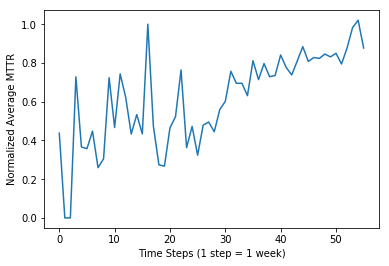

In [57]:
plt.plot(df1.MTTR)
plt.xlabel('Time Steps (1 step = 1 week)')
plt.ylabel('Normalized Average MTTR')

In [63]:
def sarima_forecast(orde, sor, tre, train,test):
    model = sm.tsa.SARIMAX(endog=train['MTTR'], exog=train[['Devices','Faults']], order=orde, seasonal_order=sord, trend=tre , enforce_invertibility=False, enforce_stationarity=False)
    result = model.fit()
    yhat = result.predict(start = len(train), end = (len(train) + len(test) -1), exog=test[['Devices','Faults']])
    return yhat[len(train)]

In [64]:
tr = ['n']
error = []
for p in ([1]):
    for q in ([1]):
        for P in ([1]):
                for Q in ([1]):
                    for m in ([5]):
                        for t in tr:
                            predictions = []
                            orde = [p,1,q]
                            sord = [P,0,Q,m]
                            tren = t
                            for index,i in test.iterrows():
                                yhat = sarima_forecast(orde, sord, tren, train, test)
                                actual = (yhat*(diff) + min_)
                                predictions.append(actual)
                                train = train.append(i)
                            rmse = sqrt(mean_squared_error(df_te['MTTR'].values,predictions))
                            combo = orde, sord, tren, rmse
                            error.append(combo)
                            print (orde, sord, tren, rmse)

/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib

/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib

/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib

/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sujay/miniconda3/envs/mtp/lib

[1, 1, 1] [1, 0, 1, 5] n 31668.82690445576


/Users/sujay/miniconda3/envs/mtp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [60]:
error

[([1, 1, 1], [1, 0, 1, 5], 'n', 31004.06690479505)]

In [61]:
df_=pd.DataFrame(predictions)
df_.index = df_.index 
print (df_)

               0
0   -3231.801651
1   26142.213534
2   16758.992262
3    3027.148166
4   23071.630540
5   29953.028280
6   13614.978728
7   23192.765256
8   32799.664099
9   20994.387922
10  28284.609743
11  30492.349323
12  32416.469659
13  33399.118884
14  34753.920747
15  27875.795897
16  26623.466248
17  25616.507774
18  22387.838983
19  16301.173128
20  12758.157389
21  10181.734562
22   6756.465997
23   4185.546222
24     -1.734192
25  -1595.838490
26  -6002.211236
27  -4324.286420
28  -4387.648212
29  -2619.207537
30  -2485.545016
31    636.301320
32   3779.924164
33   7060.200568
34   8975.478447
35   8647.743639
36  11661.612912
37  11815.439616
38  10922.769759
39   9696.582848
40  12601.462956
41  12711.762079
42  14028.757249
43  12337.321816
44  13385.156750
45  15130.455487
46  16487.840468
47  16528.635200
48  17759.054135
49  19767.239433
50  22357.562368
51  24820.604606
52  26187.816231
53  29854.063274
54  36244.852069
55  39154.894321


Text(0.5, 1.0, 'SARIMAX with WF Validation')

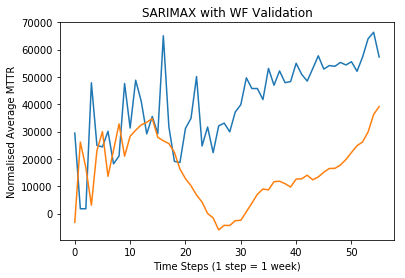

In [62]:
plt.plot((df['MTTR'].values))
plt.plot(df_)
plt.xlabel('Time Steps (1 step = 1 week)')
plt.ylabel('Normalised Average MTTR')
plt.title('SARIMAX with WF Validation')
#plt.savefig('SARIMAX.png')